In [279]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import kagglehub
import pandas as pd
import seaborn as sns


In [280]:
path = kagglehub.dataset_download("denisadutca/customer-behaviour")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\santiago.fernandezse\.cache\kagglehub\datasets\denisadutca\customer-behaviour\versions\1


In [281]:
customer_behaviour = pd.read_csv(path+'/Customer_Behaviour.csv')

In [282]:
customer_behaviour.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [283]:
le = LabelEncoder()
customer_behaviour['Gender'] = le.fit_transform(customer_behaviour['Gender'])

In [284]:

X = customer_behaviour[['Gender','Age','EstimatedSalary']]
y = customer_behaviour['Purchased']

In [285]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42, stratify=y)

In [286]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.83      0.83      0.83        24

    accuracy                           0.88        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.88      0.88      0.88        68



<Axes: >

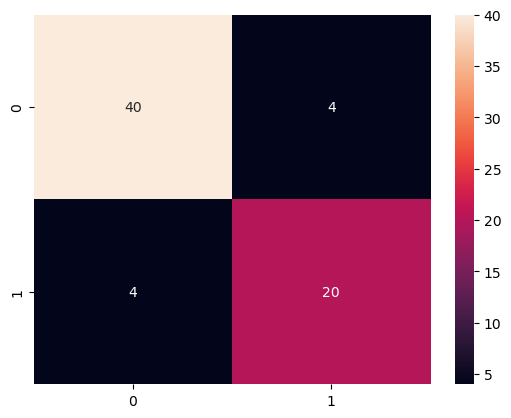

In [287]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [288]:
# Initialize the Logistic Regression classifier
mnb = MultinomialNB()

# Train the classifier
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        44
           1       0.33      0.17      0.22        24

    accuracy                           0.59        68
   macro avg       0.49      0.49      0.47        68
weighted avg       0.53      0.59      0.54        68



<Axes: >

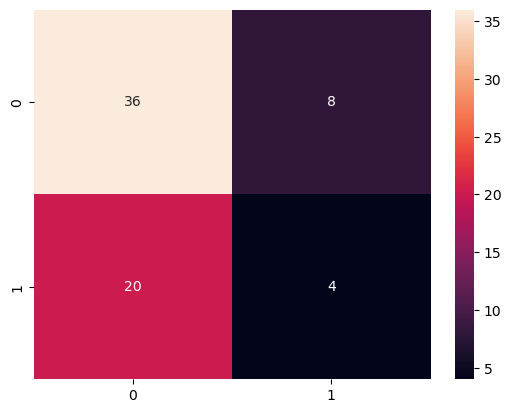

In [289]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")


In [290]:
# Initialize the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the classifier
bnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb.predict(X_test)

# Print the classification report with zero_division parameter set to 1
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        44
           1       1.00      0.00      0.00        24

    accuracy                           0.65        68
   macro avg       0.82      0.50      0.39        68
weighted avg       0.77      0.65      0.51        68



<Axes: >

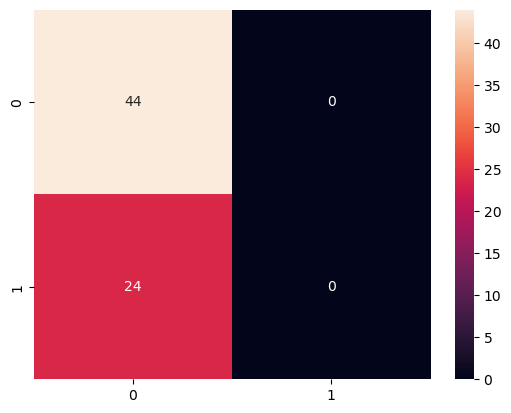

In [291]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [292]:
# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=200)

# Train the classifier
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.83      0.79      0.81        24

    accuracy                           0.87        68
   macro avg       0.86      0.85      0.85        68
weighted avg       0.87      0.87      0.87        68



<Axes: >

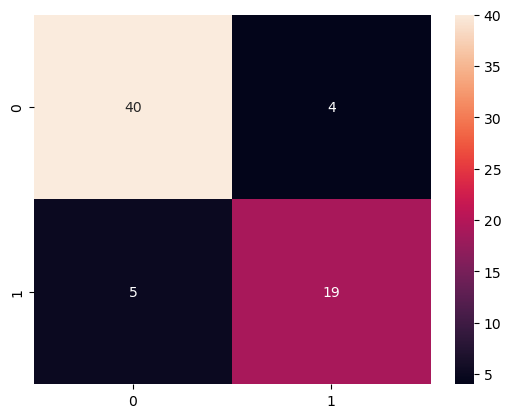

In [293]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

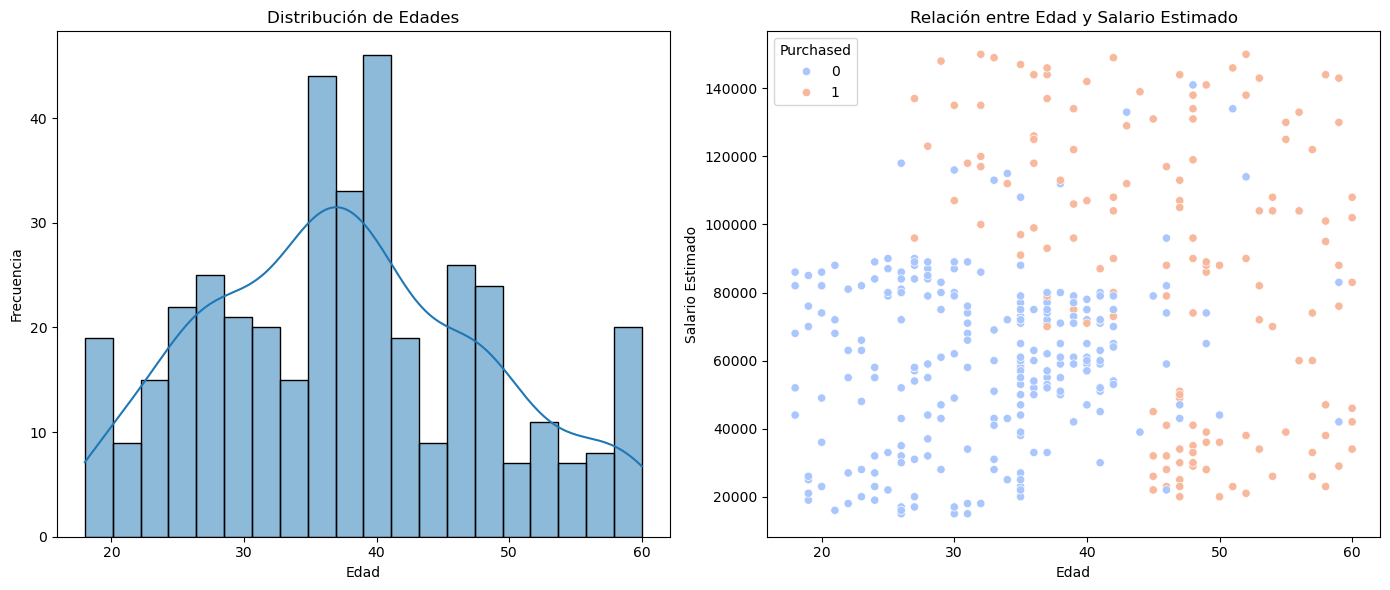

In [294]:
# Crear una figura y ejes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Graficar la distribución de las edades
sns.histplot(customer_behaviour['Age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Edades')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Frecuencia')

# Graficar la relación entre Edad y Salario Estimado coloreado por Compras
sns.scatterplot(data=customer_behaviour, x='Age', y='EstimatedSalary', hue='Purchased', palette='coolwarm', ax=ax[1])
ax[1].set_title('Relación entre Edad y Salario Estimado')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Salario Estimado')

# Mostrar la gráfica
plt.tight_layout()
plt.show()